In [1]:
import os

os.mkdir("dataset")
os.mkdir(os.path.join("dataset", "NORMAL"))
os.mkdir(os.path.join("dataset", "PNEUMONIA"))

In [2]:
import shutil

data=["/kaggle/input/chest-xray-pneumonia/chest_xray/train",
     "/kaggle/input/chest-xray-pneumonia/chest_xray/val",
     "/kaggle/input/chest-xray-pneumonia/chest_xray/test"]

for f1 in data:
    folder1=os.listdir(f1)
    for f2 in folder1:
        if f2 =="NORMAL":
            folder2=os.listdir(os.path.join(f1,f2))
            for file1 in folder2:
                shutil.copy(os.path.join(f1,f2,file1),"/kaggle/working/dataset/NORMAL")
        else:
            folder3=os.listdir(os.path.join(f1,f2))
            for file1 in folder3:
                
                shutil.copy(os.path.join(f1,f2,file1),"/kaggle/working/dataset/PNEUMONIA")
            

In [3]:
import glob
pneumonia_images= glob.glob("/kaggle/working/dataset/PNEUMONIA/*.jpeg")
normal_images= glob.glob("/kaggle/working/dataset/NORMAL/*.jpeg")
total_images=len(pneumonia_images)+len(normal_images)
percent_pneumonia=round(len(pneumonia_images)/total_images *100,2)
percent_normal=round(len(normal_images)/total_images *100,2)
print(f"The total number of images is :{total_images}\n\
while the number of pneumonia images is: {len(pneumonia_images)} with percent {percent_pneumonia}\n\
and the number of normal images is: {len(normal_images)} with percent {percent_normal}")

The total number of images is :5856
while the number of pneumonia images is: 4273 with percent 72.97
and the number of normal images is: 1583 with percent 27.03


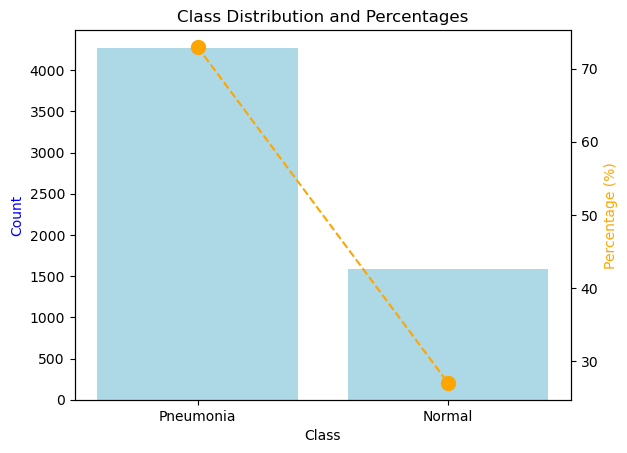

In [4]:
import matplotlib.pyplot as plt

class_labels = ['Pneumonia', 'Normal']
class_counts = [len(pneumonia_images), len(normal_images)]
class_percentages = [percent_pneumonia, percent_normal]

fig, ax1 = plt.subplots()
ax1.bar(class_labels, class_counts, color='lightblue')
ax1.set_xlabel('Class')
ax1.set_ylabel('Count', color='b')
ax1.set_title('Class Distribution and Percentages')

ax2 = ax1.twinx()
ax2.plot(class_labels, class_percentages, marker='o', color='orange', linestyle='--', markersize=10)
ax2.set_ylabel('Percentage (%)', color='orange')

plt.show()

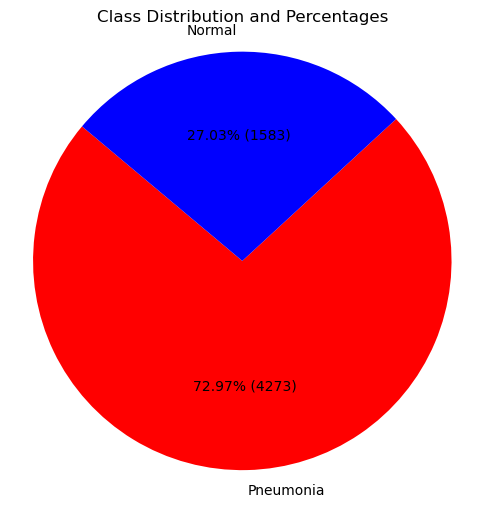

In [5]:
class_labels = ['Pneumonia', 'Normal']
class_counts = [len(pneumonia_images), len(normal_images)]
class_percentages = [percent_pneumonia, percent_normal]

colors = ['red', 'blue']
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_labels, autopct=lambda p:f'{p:.2f}% ({int(p*sum(class_counts)/100):d})', 
        startangle=140, colors=colors)
plt.axis('equal')
plt.title('Class Distribution and Percentages')

plt.show()

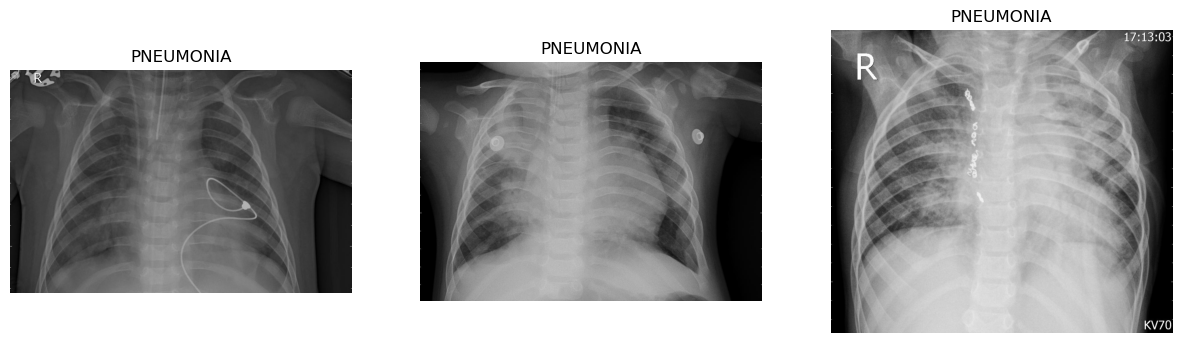

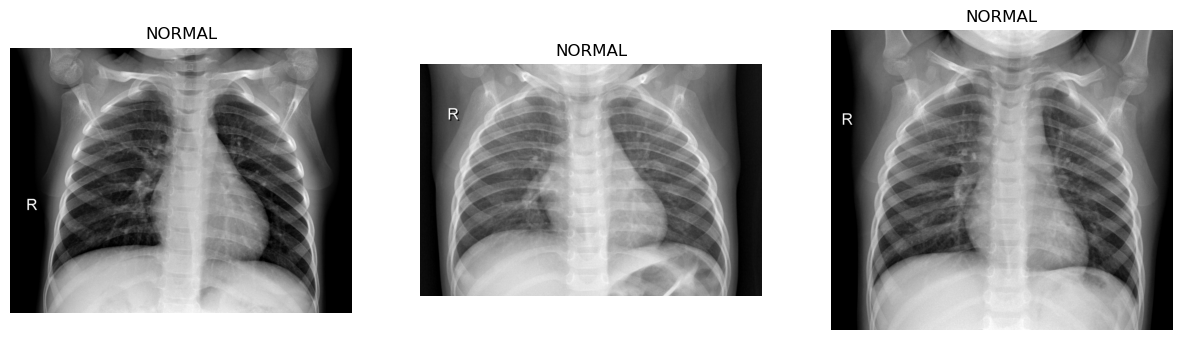

In [6]:
import random
import cv2
import numpy as np

def show_images(folder_name, plt_title):
    plt.figure(figsize=(15,10))
    for i in range(3):
        image_path = random.choice(folder_name)
        img = cv2.imread(image_path)
        plt.subplot(1, 3, i+1)
        plt.imshow(img)
        plt.title(plt_title)
        plt.axis('off')
    plt.show()
show_images(pneumonia_images, 'PNEUMONIA')
show_images(normal_images, 'NORMAL')

In [7]:
train_data_dir = '/kaggle/working/dataset'
valid_data_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/test'
img_width, img_height = 224,224
num_classes = 2

In [8]:
import tensorflow

train_generator = tensorflow.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    batch_size = 10,
    image_size =(224,224),
    shuffle = True,
    seed =123,
    validation_split =0.15,
    subset ='training'

    )
validation_generator = tensorflow.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    batch_size = 10,
    image_size =(224,224),
    shuffle = True,
    seed =123,
    validation_split =0.15,
    subset ='validation'

    )

Found 5856 files belonging to 2 classes.
Using 4978 files for training.
Found 5856 files belonging to 2 classes.
Using 878 files for validation.


In [13]:
import keras
model=keras.Sequential()

model.add(keras.layers.Conv2D(64, kernel_size=(3,3),activation='relu', input_shape=(224,224,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3),activation='relu', input_shape=(224,224,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_classes, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 186624)            0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [14]:
model.compile (optimizer = "adam" , loss ="sparse_categorical_crossentropy" , metrics = ["accuracy"])

In [56]:
history=model.fit (train_generator , validation_data = validation_generator , epochs = 20)

Epoch 1/20
498/498 [==============================] - 17s 34ms/step - loss: 0.2650 - accuracy: 0.9184 - val_loss: 0.4657 - val_accuracy: 0.8531
Epoch 2/20
498/498 [==============================] - 17s 33ms/step - loss: 0.2163 - accuracy: 0.9261 - val_loss: 0.4781 - val_accuracy: 0.8565
Epoch 3/20
498/498 [==============================] - 17s 34ms/step - loss: 0.1800 - accuracy: 0.9379 - val_loss: 0.6647 - val_accuracy: 0.8485
Epoch 4/20
498/498 [==============================] - 17s 34ms/step - loss: 0.1797 - accuracy: 0.9440 - val_loss: 0.7141 - val_accuracy: 0.8462
Epoch 5/20
498/498 [==============================] - 17s 35ms/step - loss: 0.1633 - accuracy: 0.9472 - val_loss: 0.6983 - val_accuracy: 0.8656
Epoch 6/20
498/498 [==============================] - 17s 34ms/step - loss: 0.1961 - accuracy: 0.9436 - val_loss: 0.6520 - val_accuracy: 0.8565
Epoch 7/20
498/498 [==============================] - 17s 34ms/step - loss: 0.1479 - accuracy: 0.9552 - val_loss: 0.6593 - val_accuracy:

In [57]:
test_loss, test_acc = model.evaluate(validation_generator)
print('Test accuracy:', test_acc)

88/88 [==============================] - 3s 26ms/step - loss: 1.0388 - accuracy: 0.8690
Test accuracy: 0.8690205216407776


In [68]:
import tensorflow as tf

path = "/kaggle/input/testcases/Test cases/person1010_virus_1695.jpeg"

img = tf.keras.preprocessing.image.load_img(path)
img = tf.keras.preprocessing.image.img_to_array(img)
img =  tf.image.resize(img,(224,224))

img = tf.reshape(img,[1,224,224,3])
img.shape

TensorShape([1, 224, 224, 3])

In [69]:
import numpy
prediction = model.predict(img)
predict_class = numpy.argmax(prediction)
if predict_class == 0:
    print("Normal")
else:
    print("Pneumonia")

1/1 [==============================] - 0s 17ms/step
Pneumonia


In [70]:
# serialize model to JSON
model_json = model.to_json()
with open("cnnmodel.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("cnnmodel.h5")
print("Saved model to disk")

Saved model to disk
